In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [3]:
!pip install kaggle

To download the dataset from Kaggle, you need to have your Kaggle API key configured. You can find instructions on how to do this [here](https://github.com/Kaggle/kaggle-api#authentication). Once configured, you can download the dataset using the following code:

In [4]:
!pip install kagglehub

In [5]:
import kagglehub
path = kagglehub.dataset_download("mgmitesh/plant-disease-detection-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\saisr\.cache\kagglehub\datasets\mgmitesh\plant-disease-detection-dataset\versions\1


In [6]:
!pip install tensorflow

Found 35725 files belonging to 23 classes.
Number of classes: 23


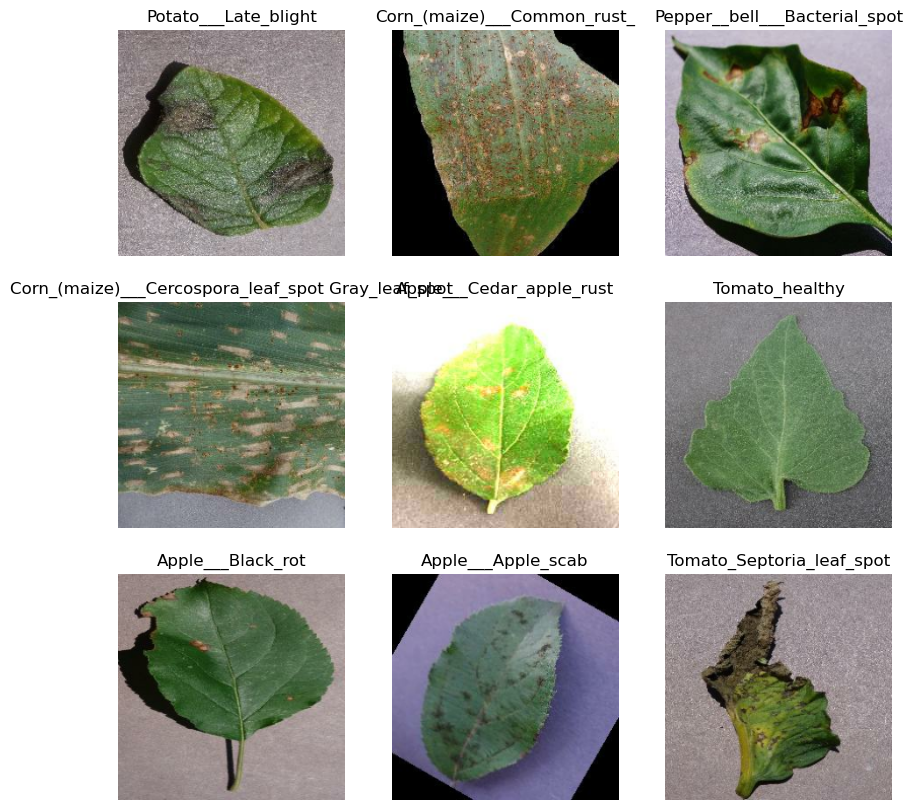

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

data_dir = r"C:\Users\saisr\.cache\kagglehub\datasets\karagwaanntreasure\plant-disease-detection\versions\1\Dataset"

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=32
)

print(f"Number of classes: {len(dataset.class_names)}")
label_names = dataset.class_names
for images, labels in dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        class_index = int(labels[i].numpy())
        plt.title(label_names[class_index])
        plt.axis("off")
    plt.show()

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
dataset_len=len(dataset)
dataset_len

1117

In [10]:
BATCH_SIZE = 16
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

In [11]:
for image_batch,label_batch in dataset.take(2):
  print(image_batch[0].shape)

(224, 224, 3)
(224, 224, 3)


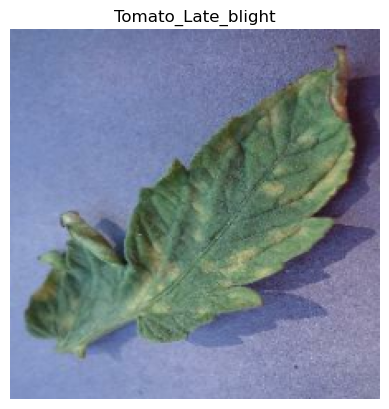

In [12]:
for image_batch,label_batch in dataset.take(2):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(dataset.class_names[label_batch[4]])
  plt.axis("off")

In [13]:
train_size=0.8
trainable_ds=int(dataset_len*train_size)
trainable_ds

893

In [14]:
train_ds=dataset.take(trainable_ds)
len(train_ds)

893

In [15]:
test_ds = dataset.skip(trainable_ds)
len(test_ds)

224

In [16]:
val_size=0.1
len(dataset)*val_size

111.7

In [17]:
val_ds=test_ds.take(111)
len(val_ds)

111

In [18]:
test_ds=test_ds.skip(111)
len(test_ds)

113

###Data Splitting-Train,Test,Validation

In [19]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)

  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds


In [20]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

893

In [22]:
len(val_ds)

111

In [23]:
len(test_ds)

113

<h2>Data Shuffling<h2>

In [24]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<h2>Data Resizing and Rescaling<h2>

In [25]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

<h2>Data Augmentation<h2>

In [26]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [27]:
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32), y))
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 23

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

D:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (16, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (16, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (16, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (16, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (16, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (16, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (16, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (16, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (16, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (16, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (16, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (16, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (16, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (16, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (16, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (16, 23)                    │           1,495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,047 (722.84 KB)

 Trainable params: 185,047 (722.84 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels.shape)

(32, 224, 224, 3)
(32,)


In [31]:
for _, labels in train_ds.take(1):
    print("Unique label values:", tf.unique(labels)[0].numpy())

Unique label values: [ 4 20 15 11 13 18  7  9 14 21  3 17  2 16 22 12  6  5  0 10 19]


In [32]:
print(len(set(dataset.class_names)))

23


In [33]:
# model.summary()
for _, y in train_ds.take(1):
    print(y.numpy())

[ 9  1  6  6  7 17 22  6 21  0 19  6  3 17  2  8 21  5 22 18 19  0 17 13
  9  6 13 20  1 19 19 13]


In [34]:
history=model.fit(train_ds,epochs=10,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/10
893/893 ━━━━━━━━━━━━━━━━━━━━ 2605s 3s/step - accuracy: 0.2573 - loss: 2.4420 - val_accuracy: 0.7086 - val_loss: 0.8838
Epoch 2/10
893/893 ━━━━━━━━━━━━━━━━━━━━ 2417s 3s/step - accuracy: 0.7232 - loss: 0.8352 - val_accuracy: 0.8300 - val_loss: 0.5050
Epoch 3/10
893/893 ━━━━━━━━━━━━━━━━━━━━ 1659s 2s/step - accuracy: 0.8149 - loss: 0.5522 - val_accuracy: 0.8626 - val_loss: 0.4267
Epoch 4/10
893/893 ━━━━━━━━━━━━━━━━━━━━ 1659s 2s/step - accuracy: 0.8663 - loss: 0.3861 - val_accuracy: 0.8908 - val_loss: 0.3182
Epoch 5/10
893/893 ━━━━━━━━━━━━━━━━━━━━ 2972s 3s/step - accuracy: 0.8963 - loss: 0.2989 - val_accuracy: 0.8894 - val_loss: 0.3266
Epoch 6/10
893/893 ━━━━━━━━━━━━━━━━━━━━ 3209s 4s/step - accuracy: 0.9130 - loss: 0.2496 - val_accuracy: 0.8846 - val_loss: 0.3710
Epoch 7/10
893/893 ━━━━━━━━━━━━━━━━━━━━ 3094s 3s/step - accuracy: 0.9257 - loss: 0.2131 - val_accuracy: 0.9119 - val_loss: 0.2514
Epoch 8/10
893/893 ━━━━━━━━━━━━━━━━━━━━ 3115s 3s/step - accuracy: 0.9344 - loss: 0.1929 - 

In [35]:
scores=model.evaluate(test_ds)
print(scores)

113/113 ━━━━━━━━━━━━━━━━━━━━ 143s 757ms/step - accuracy: 0.9385 - loss: 0.1996
[0.22265756130218506, 0.9335557222366333]


In [36]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 893}

In [37]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [38]:
class_names=dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [39]:
history.history['accuracy']

[0.4442189335823059,
 0.7535344362258911,
 0.8291923403739929,
 0.8715355396270752,
 0.897606372833252,
 0.9135638475418091,
 0.9245520830154419,
 0.9356802701950073,
 0.9419093132019043,
 0.9464235901832581]

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

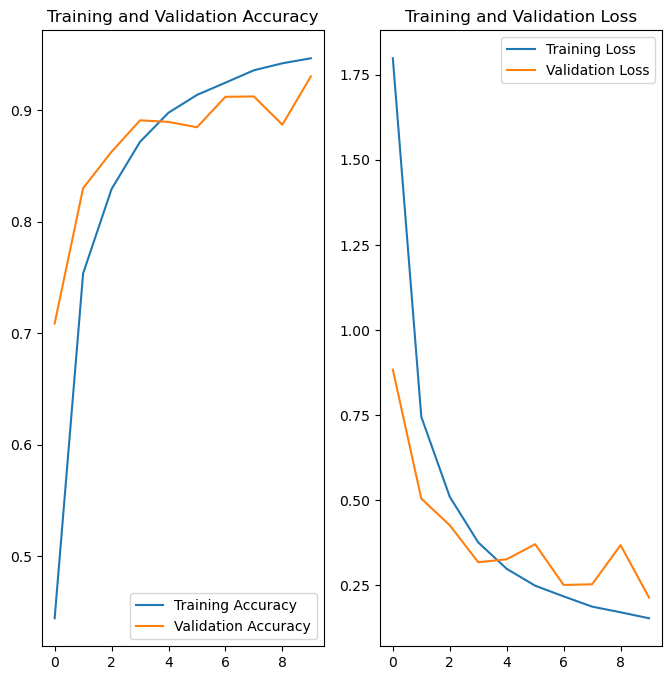

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pepper__bell___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Pepper__bell___healthy


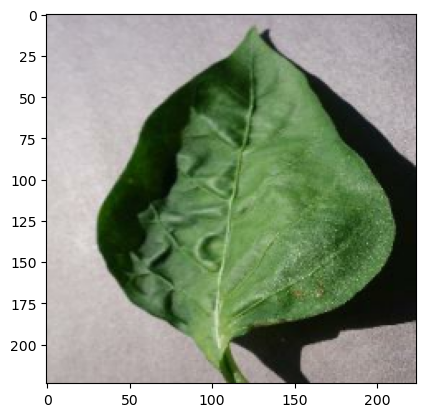

In [42]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


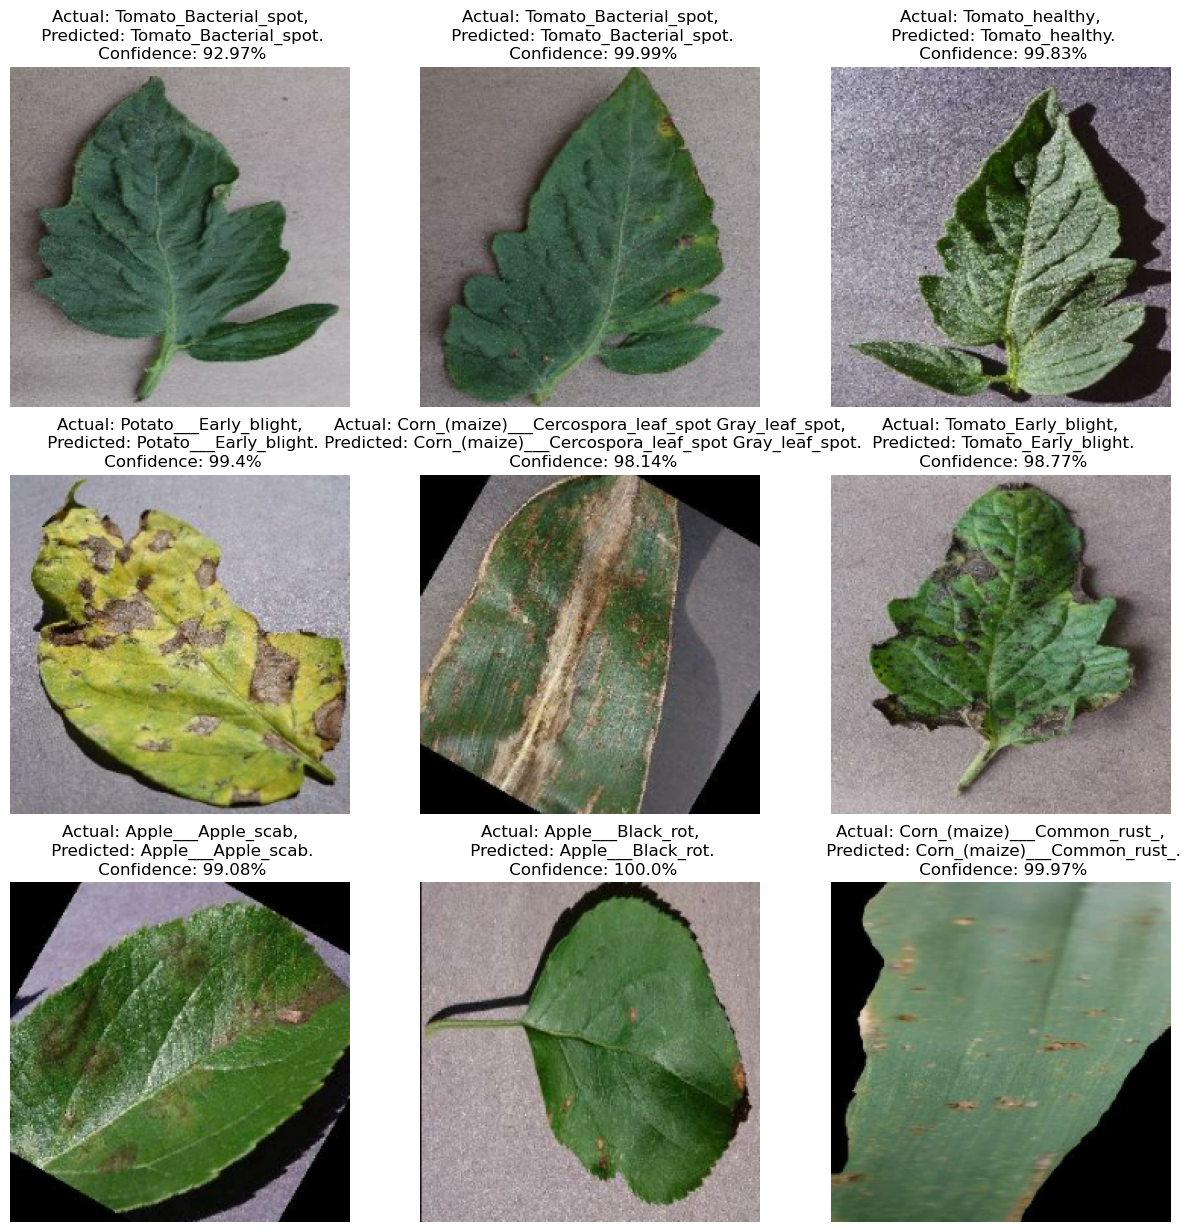

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [49]:
import os
from datetime import datetime
from tensorflow import keras  # or replace with your model's library

# Set up directory
models_dir = "models"
os.makedirs(models_dir, exist_ok=True)

# Check existing versions
existing_versions = [
    int(fname.split('_v')[-1].split('.h5')[0])  # Extract version number
    for fname in os.listdir(models_dir)
    if fname.startswith("model_v") and fname.endswith(".h5")
]
model_version = max(existing_versions + [0]) + 1

# Construct file path
save_path = f"{models_dir}/model_v{model_version}.h5"

# Save the model
model.save(save_path)

# Confirmation
print(f"✅ Model saved to: {save_path}")
print("📁 Contents of 'models':", os.listdir(models_dir))

✅ Model saved to: models/model_v1.h5
📁 Contents of 'models': ['model_v1.h5']


### Setting up a Local Environment with GPU Support

This guide will walk you through setting up a local environment to run this notebook on a machine with an NVIDIA GPU. This is particularly useful for training models with a large number of epochs to avoid timeouts and have more control over the environment.

**1. Install Python and Jupyter Notebook:**

If you don't have them already, install Python (preferably 3.8 or later) and Jupyter Notebook. A great way to do this is by installing the [Anaconda Distribution](https://www.anaconda.com/products/distribution), which comes with Python, Jupyter, and many other useful data science libraries.

**2. Install NVIDIA Drivers, CUDA, and cuDNN:**

This is the most critical step for enabling GPU acceleration in TensorFlow.

*   **NVIDIA Drivers:** Ensure you have the latest drivers for your NVIDIA GPU. You can download them from the [NVIDIA website](https://www.nvidia.com/Download/index.aspx).
*   **CUDA Toolkit:** TensorFlow requires a specific version of the CUDA Toolkit. You'll need to check the [TensorFlow documentation](https://www.tensorflow.org/install/gpu#software_requirements) to find the version that is compatible with the version of TensorFlow you plan to use.
*   **cuDNN:** The NVIDIA CUDA® Deep Neural Network library (cuDNN) is a GPU-accelerated library of primitives for deep neural networks. You'll need to download the version of cuDNN that corresponds to your CUDA Toolkit version from the [NVIDIA developer website](https://developer.nvidia.com/cudnn).

**3. Set up a Virtual Environment (Recommended):**

Using a virtual environment is highly recommended to keep your project's dependencies isolated from your system's Python installation.

If you are using `venv`:

In [ ]:
# conda create --name my_plant_project python=3.9
# conda activate my_plant_project

In [ ]:
# pip install tensorflow[and-cuda]

In [ ]:
# pip install numpy pandas matplotlib kaggle

In [ ]:
# jupyter notebook